The best performing ad with epsilon 0.1 is A
No. of times optimal ad was shown is 9182
No. of times explored: 996
No. of times exploited: 9004
The best performing ad with epsilon 0.01 is A
No. of times optimal ad was shown is 9870
No. of times explored: 92
No. of times exploited: 9908


The best performing ad with epsilon 0.03 is C
No. of times optimal ad was shown is 133
No. of times explored: 309
No. of times exploited: 9691


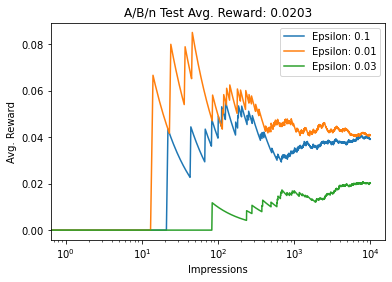

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class BernoulliBandit(object):
    def __init__(self, p):
        self.p = p
    
    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward
    
bandit_probs = [0.04, 0.016, 0.02, 0.028, 0.031] #These probabilities represent the reward distribution per each bandit (ad here).

ads = [BernoulliBandit(i) for i in bandit_probs]

n_trails = 10000
n_ads = len(ads)
epsilons = [0.1, 0.01, 0.03]


for epsilon in epsilons:
    n_optimal_pulls = 0
    n_explored = 0
    n_exploited = 0
    Q = np.zeros(n_ads)  # Q, action values
    N = np.zeros(n_ads)  # N, total impressions
    total_reward = 0
    avg_rewards = []  # Save average rewards over time

    for i in range(n_trails):
        p = np.random.random()
        if p < epsilon:
            n_explored+=1
            ad_chosen = np.random.randint(n_ads)
        else:
            ad_chosen = np.argmax(Q)
            n_exploited+=1
        
        if ad_chosen == np.argmax(bandit_probs):
                n_optimal_pulls +=1

        R = ads[ad_chosen].display_ad()  # Observe reward
        N[ad_chosen] += 1
        Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
        total_reward += R
        avg_reward_so_far = total_reward / (i + 1)
        avg_rewards.append(avg_reward_so_far)

    best_ad_index = np.argmax(Q)  # Find the best action
    print("The best performing ad with epsilon {} is {}".format(epsilon, chr(ord('A') + best_ad_index)))
    print("No. of times optimal ad was shown is", n_optimal_pulls)
    print("No. of times explored:", n_explored)
    print("No. of times exploited:", n_exploited)
    
    df_reward_comparison = pd.DataFrame(avg_rewards, columns=['A/B/n'])
    df_reward_comparison['A/B/n'].plot(title="A/B/n Test Avg. Reward: {:.4f}"
                                    .format(avg_reward_so_far), label = "Epsilon: {}".format(epsilon))
    plt.xlabel("Impressions")
    plt.ylabel("Avg. Reward")
    plt.xscale('log')
plt.legend()
plt.show()